# Resistance Measurements of 2nd Batch of Sponge-Wedge Chips

## Summary Graphs

### Data
Electrical resistances from a total of n=3 chips were measured. 

Data are organized in dictionaries of repeated measurements of averages and standard deviations of 100 observations for each channel (using the Keithley Multimeter device). Each value is the average and the standard deviation of the 100 observations. Keys of the dictionary are protocols, and value is the data (which is a dictionary, too). The data dictionary is 

In [1]:
data_csv_filename = '2nd_batch_resistances_py.xlsx'

In [2]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [3]:
import os
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [5]:
print(data_path)

/home/mkrause/data/biofuel-cell/2nd_batch_resistances_py.xlsx


In [6]:
sheet_names = [
    'protocol01_positive_control', 
    'protocol02_positive_control', 
    'protocol03_positive_control']
# for sheet_name in sheet_names:
df = pd.read_excel(data_path, sheet_name=sheet_names[0])

In [7]:
df.head()

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,chip_id
0,3190,0.128,0.000040,1
1,42900000,73100.000,0.001704,1
2,3920,3.000,0.000765,1
3,40370000,172000.000,0.004261,1
4,95400000,700000.000,0.007338,1


Read all sheets of the Excel file

In [8]:
xlsx = pd.read_excel(data_path, sheet_name=None)
print(xlsx.keys())

dict_keys(['protocol01_positive_control', 'protocol01_negative_control', 'protocol02_positive_control', 'protocol02_negative_control', 'protocol03_positive_control', 'protocol03_negative_control'])


Add a 'Sheet' column to each dataframe

In [9]:
for sheet_name in xlsx.keys():
    xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [10]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys() if 'positive' in frame)

In [11]:
df.head()

,R_avg [Ohm],R_stdev [Ohm],fraction of R_stdev,chip_id,Sheet
0,3190,0.128,0.000040,1,protocol01_positive_control
1,42900000,73100.000,0.001704,1,protocol01_positive_control
2,3920,3.000,0.000765,1,protocol01_positive_control
3,40370000,172000.000,0.004261,1,protocol01_positive_control
4,95400000,700000.000,0.007338,1,protocol01_positive_control


In [12]:
print(df)

   R_avg [Ohm]  R_stdev [Ohm]  fraction of R_stdev  chip_id  \
0         3190          0.128             0.000040        1   
1     42900000      73100.000             0.001704        1   
2         3920          3.000             0.000765        1   
3     40370000     172000.000             0.004261        1   
4     95400000     700000.000             0.007338        1   
5         3530         10.500             0.002975        1   
6         4040         24.700             0.006114        1   
7         3000         11.000             0.003667        1   
8         4150         56.000             0.013494        1   
0         5400         51.000             0.009444        2   
1        30000         71.000             0.002367        2   
2        39000        156.000             0.004000        2   
3      1240000      32000.000             0.025806        2   
4       212000        417.000             0.001967        2   
5        38000         53.000             0.001395     

## Plot all data

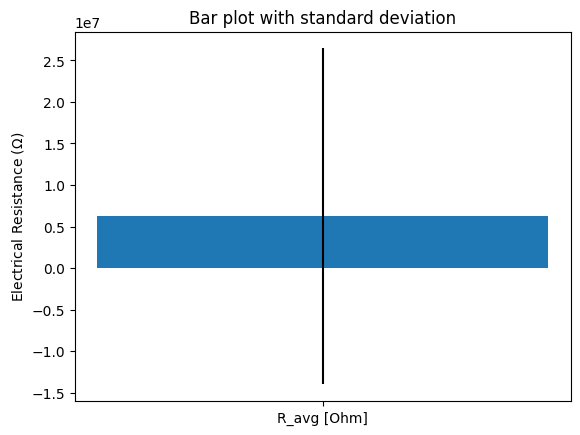

In [13]:
# Assuming df is your DataFrame and 'A' and 'B' are your columns
mean = df['R_avg [Ohm]'].mean()
std_dev = df['R_avg [Ohm]'].std()

# Create a single bar plot with error bars
plt.bar('R_avg [Ohm]', mean, yerr=std_dev)

plt.title('Bar plot with standard deviation')
#plt.xlabel('Column A')
plt.ylabel('Electrical Resistance ($\Omega$)')

plt.show()

Plot each average of a 100 samples with its corresponding standard deviation.

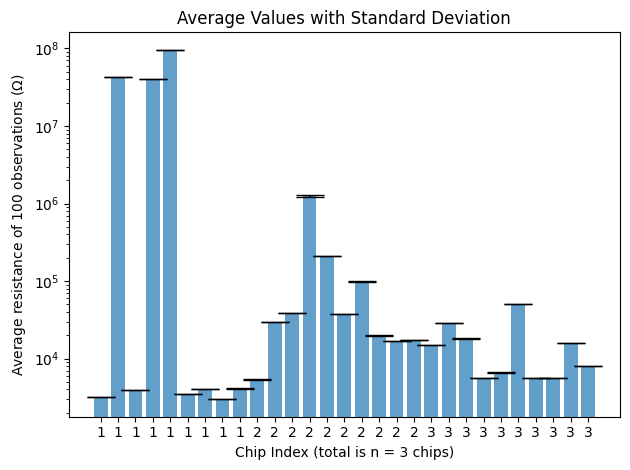

In [19]:
# Assuming df is your DataFrame and 'average' and 'std_dev' are your columns
averages = df['R_avg [Ohm]']
std_devs = df['R_stdev [Ohm]']

# Create an array with the positions of each bar on the x-axis
x_pos = np.arange(len(averages))

# Create a bar plot with error bars
plt.bar(x_pos, averages, yerr=std_devs, align='center', alpha=0.7, ecolor='black', capsize=10)

# Set the y-axis to be logarithmic
plt.yscale('log')


# Customize the plot
plt.ylabel('Average resistance of 100 observations ($\Omega$)')
plt.xlabel('Chip Index (total is n = 3 chips)')
plt.title('Average Values with Standard Deviation')
plt.xticks(x_pos, df['chip_id'])
plt.tight_layout()

fig_filename = os.path.join(_Utility.get_user_data_dir_path(), 'resistances_2nd_batch.png')
plt.savefig(fig_filename)

# Display the plot
plt.show()
